## The SEIR model

The SEIR model of epidemiology partitions the population into three compartments: susceptibles, S, who can catch the disease; exposed, E, that has caught the infection but is not infectious;  infectives, I, who have already caught the disease and infect susceptibles; and recovered individuals, R. Since the disease is assumed not to be fatal, the sum $N=S+I+R$ remains constant. The rate at which the susceptibles get infected is 
$$
\lambda(t) = \frac{\beta I}{N}
$$
where the parameter $\beta$ is the probability of infection on contact. The infected individuals recover from the disease at a rate $\gamma$. Then, the ordinary differential equations of the SIR model are

\begin{align}
\dot S &= -\lambda(t)S \\
\dot E &= \lambda(t)S - \zeta E \\
\dot I &= \zeta E - \gamma I \\
\dot R &= \gamma I 
\end{align}

Here $ 1/\zeta$ can be interpreted as the average incubation period. This example integrates the above equations to obtain what is called the **epidemic curve**: a plot of the number of susceptibles and infectives as a function of time. 

In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
from matplotlib import rc; rc('text', usetex=True)

In [40]:
M = 1                  # the SIR model has no age structure
Ni = 1000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate 
gamma = 0.1            # recovery rate 
alpha = 0              # fraction of asymptomatic infectives 
zeta  = 0.04
fsa   = 1              # the self-isolation parameter 

E0  = np.array([0])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no recovered individuals initially 
S0  = N-(Ia0+Is0+R0+E0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 500;  Nt=160; filename = 'this.mat'

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'zeta':zeta,'fsa':fsa}
model = pyross.models.SEIR(parameters, M, Ni)

# simulate model
model.simulate(S0, E0, Ia0, Is0, contactMatrix, Tf, Nt, filename)

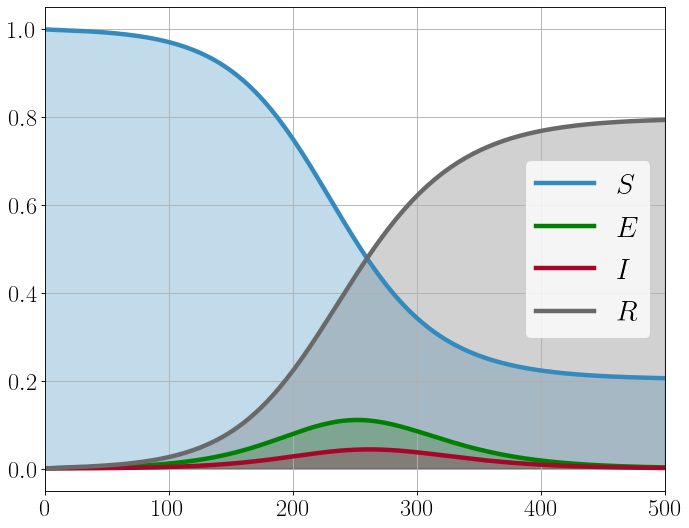

In [41]:
# plot the data and obtain the epidemic curve

from scipy.io import loadmat
data=loadmat(filename)

S  = data['X'][:,0].flatten()
E  = data['X'][:,1].flatten()
Ia = data['X'][:,2].flatten()
Is = data['X'][:,3].flatten()
t = data['t'][0]

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)


plt.fill_between(t, 0, Is/N, color='#A60628', alpha=0.3)
plt.plot(t, Is/N, '-', color='#A60628', label='$I$', lw=4)

R=N-S-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)